# **ASSIGNMENT-1**

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix




In [19]:

df=pd.read_csv('/content/NSL_KDD_with_label.csv')
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,102,udp,dns,REJ,43879,34020,1,1,0,2,...,25,0.416285,0.753814,0.557425,0.171273,0.707523,0.811163,0.440121,0.781523,1
1,435,icmp,ftp,REJ,10789,20587,1,2,1,6,...,114,0.448851,0.219059,0.256021,0.741638,0.031175,0.032825,0.091137,0.930808,0
2,860,icmp,ssh,SF,44165,41131,1,2,0,5,...,128,0.599011,0.443040,0.650828,0.302640,0.870197,0.467859,0.718604,0.245750,1
3,270,icmp,smtp,S0,12999,9650,1,0,1,6,...,55,0.071735,0.617813,0.116274,0.662372,0.138653,0.646621,0.213737,0.576959,0
4,106,icmp,ftp,SF,814,19933,0,0,2,4,...,252,0.226759,0.769974,0.536410,0.158283,0.127312,0.830033,0.196954,0.274545,0


In [20]:
df = pd.get_dummies(df, drop_first=True)
X = df.drop('label_normal', axis=1, errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(X_scaled)


In [22]:
df['anomaly'] = df['anomaly'].map({1:0, -1:1})


In [23]:
df[['anomaly']].head()


,anomaly
0,0
1,0
2,0
3,0
4,0


# **EXPLINATION**

Step 1: First i imported all library files required for scaling data

Step 2: Then i lodaded data set

Step 3: Next i prepared the dataset for the model and  converted categorical values into numbers, separated useful features, and scaled the data.

Step 4: After converting categorical value then i have applied the Isolation Forest algorithm which helps in  identify unusual or suspicious network activities.

Step 5: After applying Isolation Forest Algorithm then i converted the model output into simple binary labels where 0 represents normal traffic and 1 represents anomaly.

# ASSIGNMENT-**2**

In [26]:



y_true = df['label']     # 0 = normal, 1 = attack
y_pred = df['anomaly']

cm = confusion_matrix(y_true, y_pred)
print(cm)

TN, FP, FN, TP = cm.ravel()

print("False Positives:", FP)
print("False Negatives:", FN)


[[134  14]
 [136  16]]
False Positives: 14
False Negatives: 136


# **ASSIGNMENT-3**

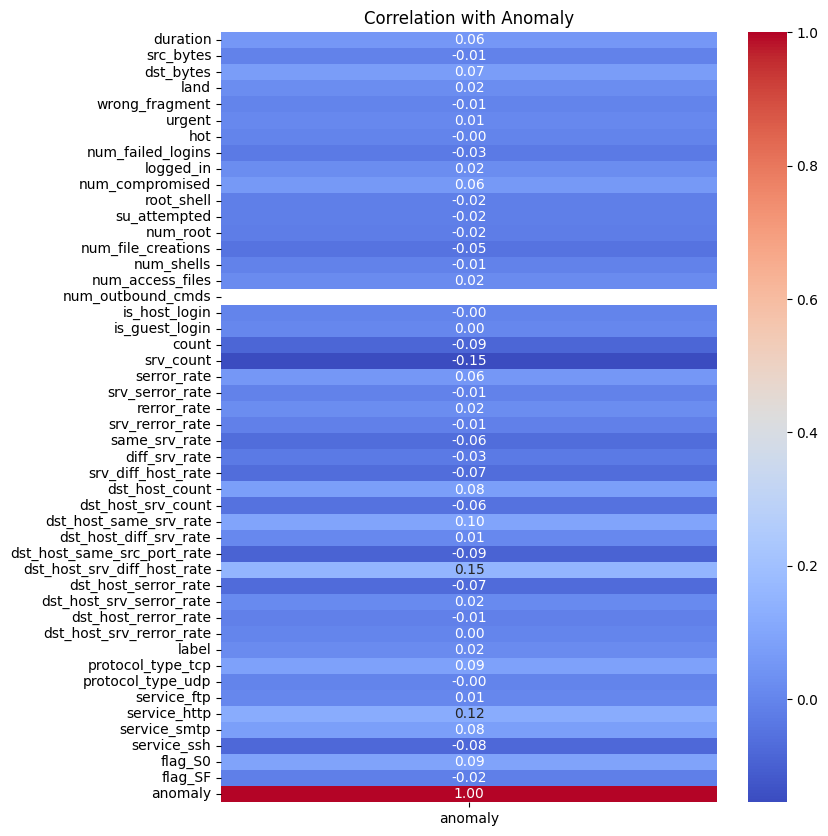

In [36]:





corr = df.corr(numeric_only=True)[['anomaly']]

plt.figure(figsize=(8,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation with Anomaly")
plt.show()
